In [1]:
import numpy as np
import pandas as pd

In [2]:
x_bat = pd.read_csv("stacked_batting_features.csv")
x_bat.head()

,player_id,year-0,g-0,ab-0,r-0,h-0,double-0,triple-0,hr-0,rbi-0,...,sb_ratio-5,bb_per_pa-5,so_per_ab-5,slg-5,obp-5,rc-5,rc_per_ab-5,babip-5,iso-5,pa_per_so-5
0,ordazlu01,1997.0,12.0,22.0,3.0,6.0,1.0,0.0,0.0,1.0,...,0.400000,0.108108,0.138298,0.244681,0.308411,7.160377,0.067551,0.256098,0.021277,8.153846
1,distebe01,1984.0,45.0,78.0,10.0,13.0,1.0,2.0,3.0,9.0,...,1.000000,0.094972,0.194805,0.337662,0.333333,16.725146,0.097808,0.295082,0.090909,5.700000
2,schmimi01,1972.0,13.0,34.0,2.0,7.0,0.0,0.0,1.0,3.0,...,0.652174,0.154993,0.224265,0.573529,0.393393,121.814815,0.187986,0.282443,0.299632,5.311475
3,thomeji01,1991.0,27.0,98.0,7.0,25.0,4.0,2.0,1.0,9.0,...,0.500000,0.190994,0.279208,0.611881,0.449686,137.770701,0.219380,0.362805,0.300990,4.453901
4,diazma02,2003.0,4.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.666667,0.021429,0.237037,0.303704,0.264286,10.695652,0.077505,0.303922,0.059259,4.312500


In [3]:
y_bat = pd.read_csv("batting_yarr.csv")
y_bat7 = y_bat['0'] # start by looking at just data from year 7
y_bat7.head()

0    0.0
1    0.0
2    6.2
3    5.5
4    1.7
Name: 0, dtype: float64

In [4]:
features = x_bat.columns.tolist()
X = x_bat.as_matrix()
y = list(y_bat7)
# check if X order matches y
xplayers = X[:,0]
yplayers = y_bat['player_id']
mismatches = sum(xplayers != yplayers)
print('id mismatches: ' + str(mismatches) + ' of ' + str(len(xplayers)))
X = X[:,1:]

id mismatches: 0 of 1669


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Scaler = MinMaxScaler()
Scaler.fit(X)

/Users/johollen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [7]:
X = Scaler.transform(X)
k = 200
Xr = SelectKBest(f_regression, k).fit_transform(X, y)
# should split data earlier but can't figure out how to save transform from selectkbest
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xr, y, test_size=0.20, random_state=54321)


In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

MLP = MLPRegressor(activation='logistic', hidden_layer_sizes = (5), solver='lbfgs', alpha =1, random_state=54321)
param_grid = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
              1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
param_dict = {"alpha" : param_grid}
clf = GridSearchCV(MLP, param_dict, return_train_score=True, scoring='r2')
clf.fit(Xtrain, Ytrain)
clf.cv_results_
print(clf.best_params_)
clf.best_score_

{'alpha': 10}


0.45265427797839469

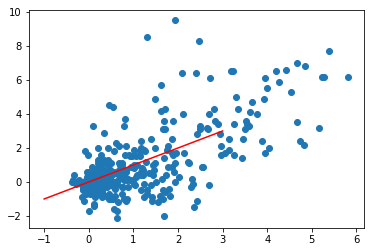

In [9]:
import matplotlib.pyplot as plt

Ypred = clf.predict(Xtest)
plt.scatter(Ypred, Ytest)
plt.plot([-1,3],[-1,3], 'r-')
plt.show()

In [11]:
from sklearn.metrics import r2_score

r2_score(Ytest, Ypred)

0.46517393324207734